# Gradient Descent
 
In machine learning a loss function is used to penalize the model for learning parameters $\theta$ that fail to approximate $F$ accurately. A loss function is similar to an evaluation metric, with the important difference: loss functions should always be differentiable, while evaluation metrics don't have to be differentiable.
 
Gradient descent is how a machine learning model learns parameters $\theta$ incrementally. Gradient descent only works for differentiable loss functions. The goal of gradient descent is to minimize the loss function - find the local minimum of the loss function with respect to parameters. The optimization method is called gradient descent because it involves differentiating the loss function with respect to each parameter to obtain the gradient, and then 'moving' these parameters in the direction of steepest descent on the loss function/surface.
 
Recalling our formulation of single variable linear regression from Lesson 1
 
$$\hat{y} = f(\mathbf{X}; \theta) = \theta_0 + \theta_1 x_1$$
 
We can choose the following loss function since it differentiates nicely:
 
$$L(x;\theta) = \frac{1}{2} (y - \hat{y})^2$$
 
Gradient of $L$ w.r.t $\hat{y}$: 
$$\frac{\partial L}{\partial \hat{y}} = -(y-\hat{y})$$
 
Gradient of $L$ w.r.t. $\theta_1$: 
$$\frac{\partial L}{\partial \theta_1} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial \theta_1}=-(y-\hat{y})\cdot x_1$$
 
Gradient of $L$ w.r.t. $\theta_0$: 
$$\frac{\partial L}{\partial \theta_0} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial \theta_0}=-(y-\hat{y})$$
 
We update the learnable parameters using their gradients and the learning rate. The learning rate is tunable hyper-parameter $\eta$.
 
$$\theta_1=\theta_1 - \eta \frac{\partial L}{\partial \theta_1}$$ 
$$\theta_0=\theta_0 - \eta \frac{\partial L}{\partial \theta_0}$$
 
We often initialize the parameters $\theta$ to a random value. In some cases we can use prior information to start somewhere better on the loss surface.

Gradient descent in linear regression:
<img src="lr_gd.gif" width="750" align="center">

#### Why gradient descent?
 
You might be asking: why not just solve for $\frac{\partial L}{\partial \theta_1} = \frac{\partial L}{\partial \theta_0} = 0$ to find the parameters for the minimum of the loss function?
 
In deep learning, it is common for there to be 1000s of parameters in a model, which creates high-dimensional parameter spaces. It is usually computationally intractable or even impossible to calculate the global minimum of these loss functions. In very complex deep learning problems we often settle for local minima.
 
<img src="gd_multi_modal.gif" width="750" align="center">

#### Epochs
 
We often want the machine learning model to 'observe' every training sample more than once to 'extend' the gradient descent journey. Hence, we train a model using multiple epochs.
 
An epoch means that we have passed each sample in the training set one time through. Too many epochs may lead to overfitting, too few epochs may lead to underfitting.
 
## Types of Gradient Descent ('Optimization Strategies')
 
Suppose we have $n$ training samples s.t $x = \{x_1, ..., x_n\}$ and $y=\{y_1, ..., y_n\}$
 
<u> Batch gradient descent </u>: uses all of the training data (batch) to compute the gradient for a single epoch. Then we take the average of the gradients and update weights using the average. Advantage = smooth convergence to minima, disadvantage = computationally intensive.
 
For example, for our linear regression example suppose the loss function is the mean squared error:
 
$$L(x; \theta) = MSE = \frac{1}{n} \sum_{i}^{n}(y_i - \hat{y_i})^2$$
 
$$L(x; \theta) = MSE = \frac{1}{n} ((y_1 - \hat{y_1})^2 + (y_2 - \hat{y_2})^2 + ... + (y_n - \hat{y_n})^2)$$
 
$$L(x; \theta) = MSE = \frac{1}{n} ((y_1 - (\theta_0 + \theta_1 x_1))^2 + ... + (y_n - (\theta_0 + \theta_1 x_n))^2)$$
 
and the gradient for $\theta_1$ would be:
 
$$\frac{\partial L}{\partial \theta_1} = \frac{2}{n} \sum_{i}^{n}(y_i - \hat{y_i})x_i$$
 
<u> Stochastic gradient descent (SGD) </u>: We randomly select one training sample to calculate the gradient and update the parameters. Advantage = fast convergence, disadvantage = fluctuates alot.
 
The linear regression example in the previous section used SGD.
 
<u> Mini-batch gradient descent </u>: divides the dataset into groups of samples called batches of size $n_b$. This is a compromise between batch gradient descent and SGD.
 
From our linear regression example, the loss function is the mean squared error of $n_b$ samples:
 
$$L(x; \theta) = MSE = \frac{1}{n_b} \sum_{i}^{n_b}(y_i - \hat{y_i})^2$$
 
and the gradient for $\theta_1$ would be:
 
$$\frac{\partial L}{\partial \theta_1} = \frac{2}{n_b} \sum_{i}^{n_b}(y_i - \hat{y_i})x_i$$

### Demonstrating Types of Gradient Descent Applied to Linear Regression

APPLYING BATCH GRADIENT DESCENT


<IPython.core.display.Javascript object>


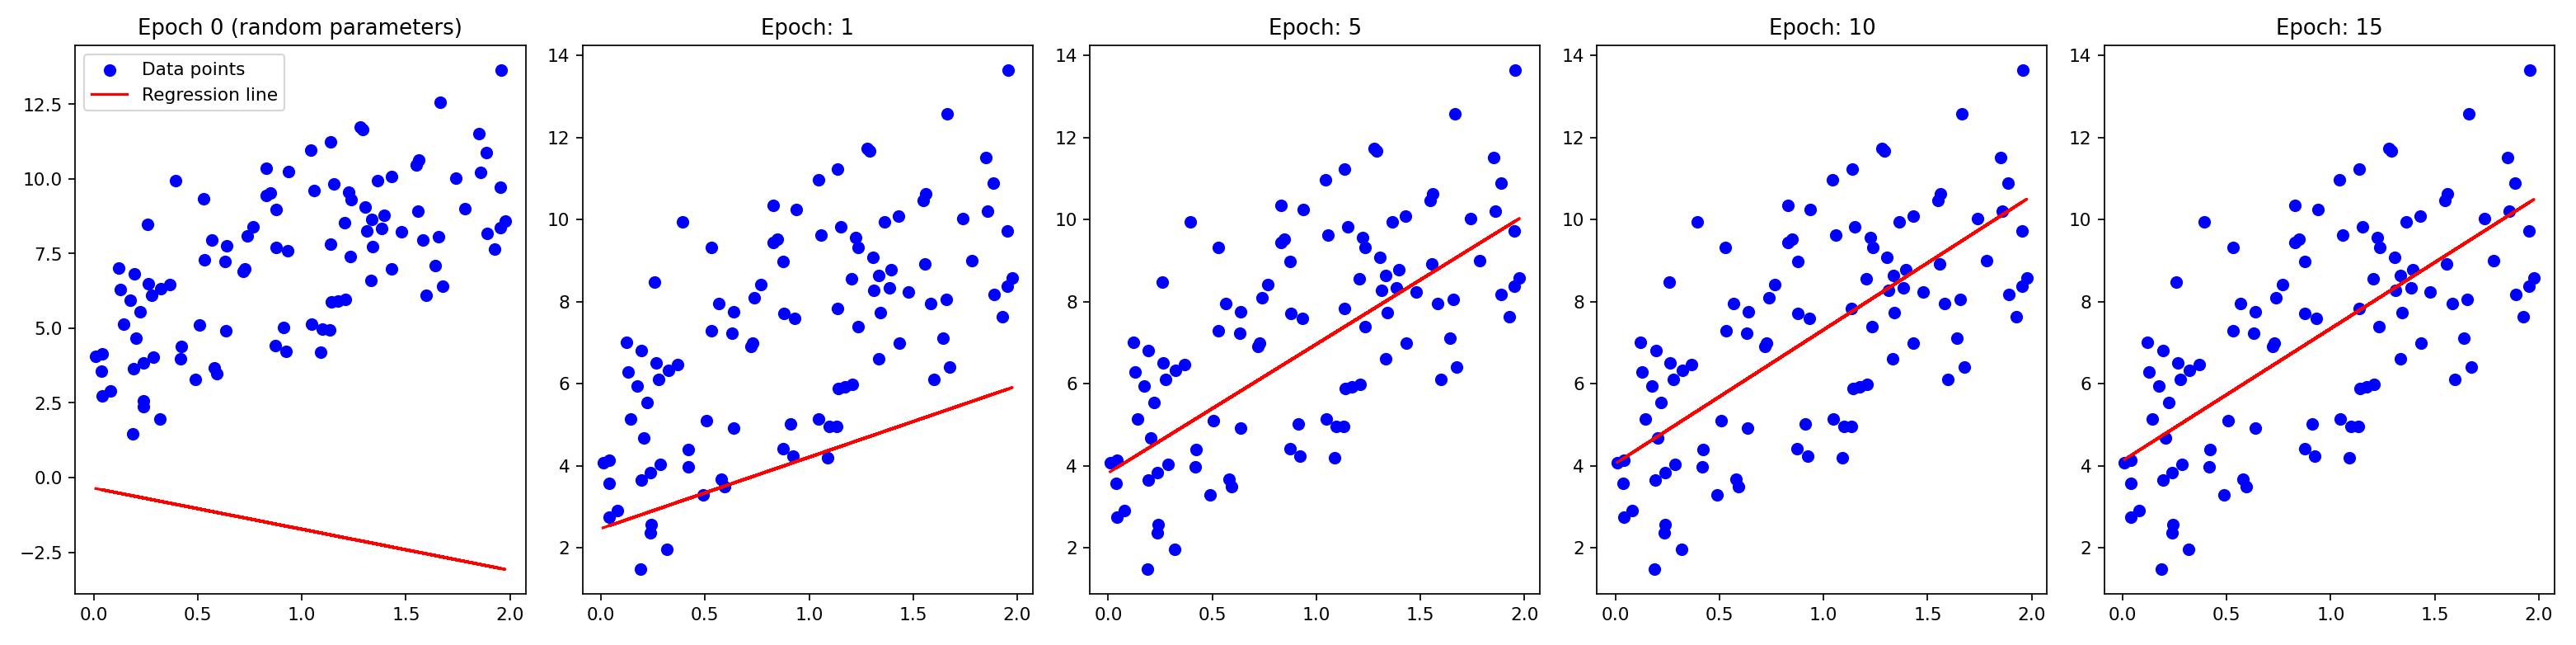

<IPython.core.display.Javascript object>


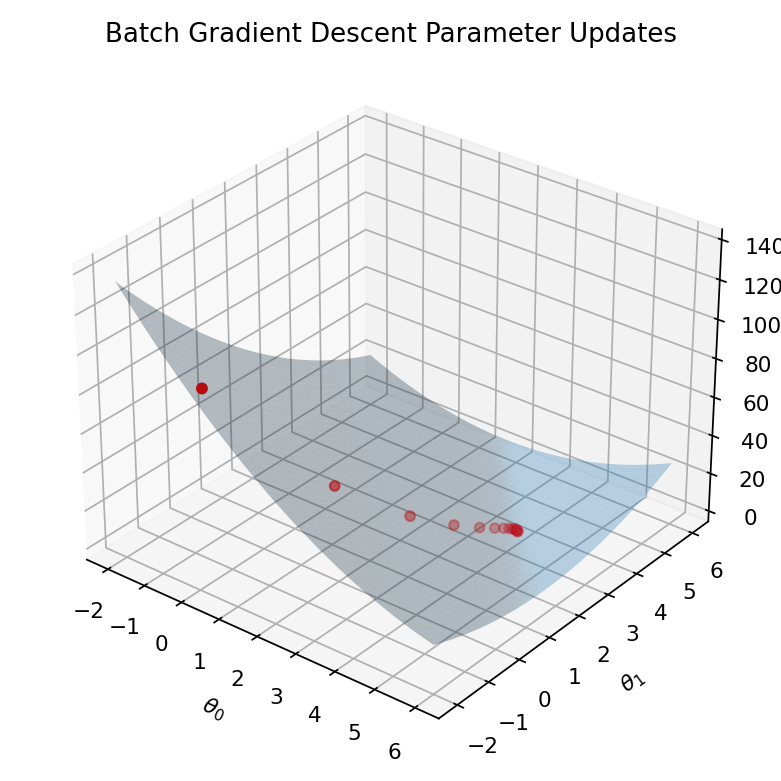

APPLYING STOCHASTIC GRADIENT DESCENT


<IPython.core.display.Javascript object>


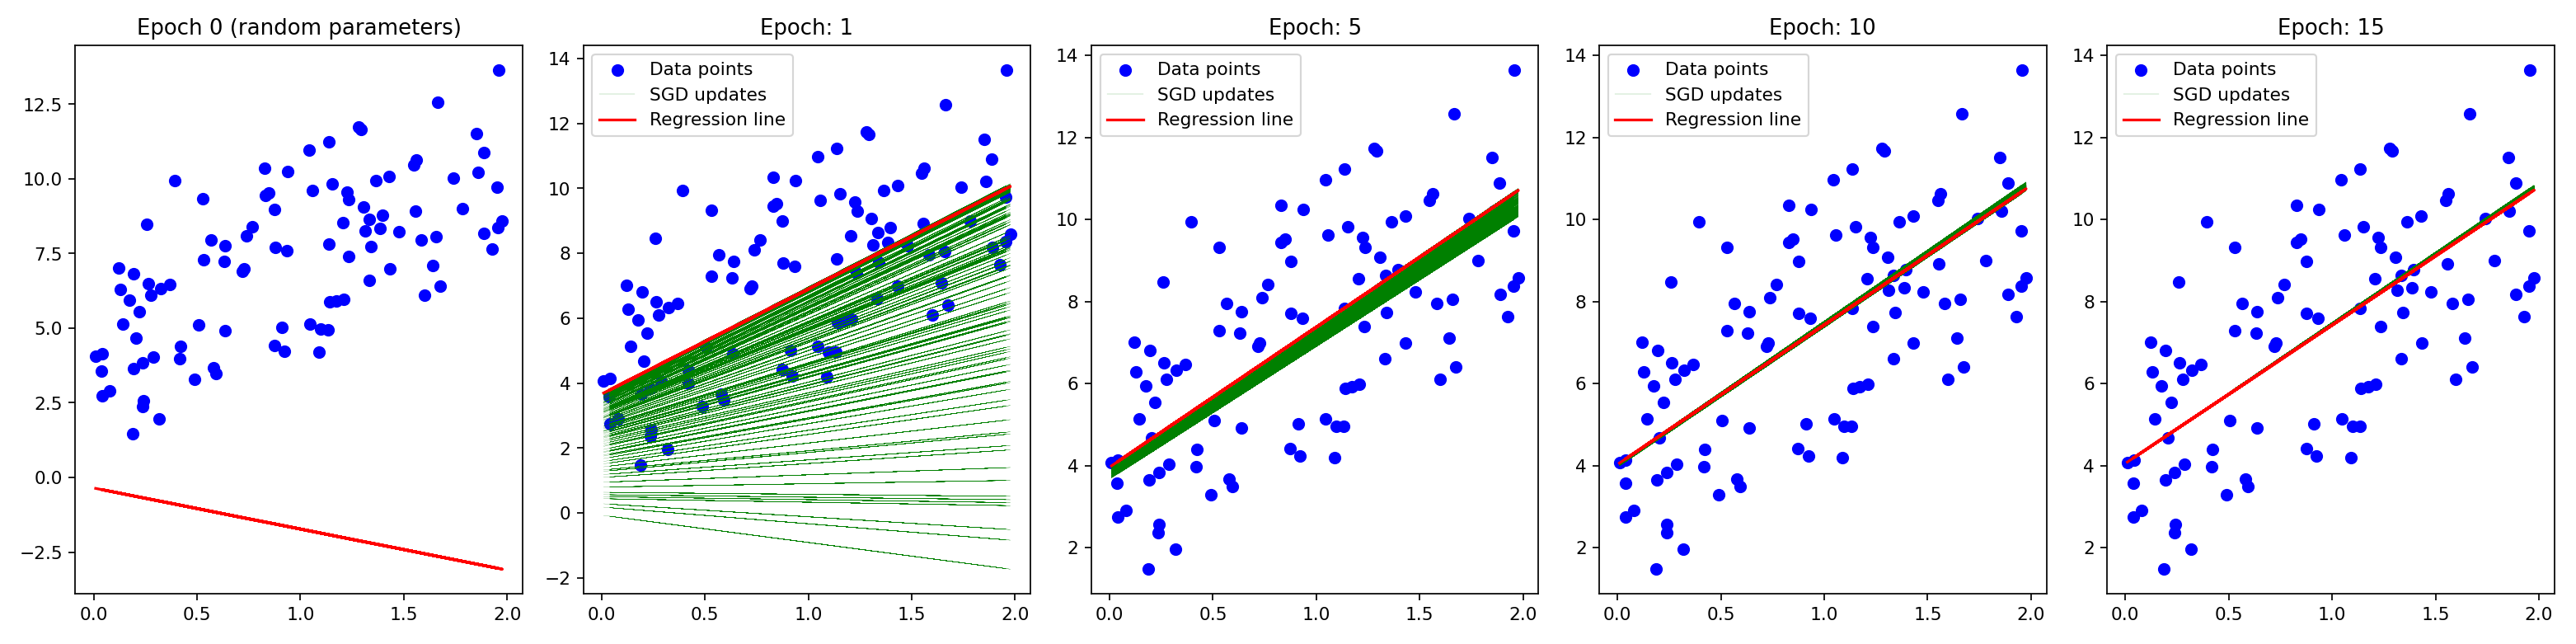

<IPython.core.display.Javascript object>


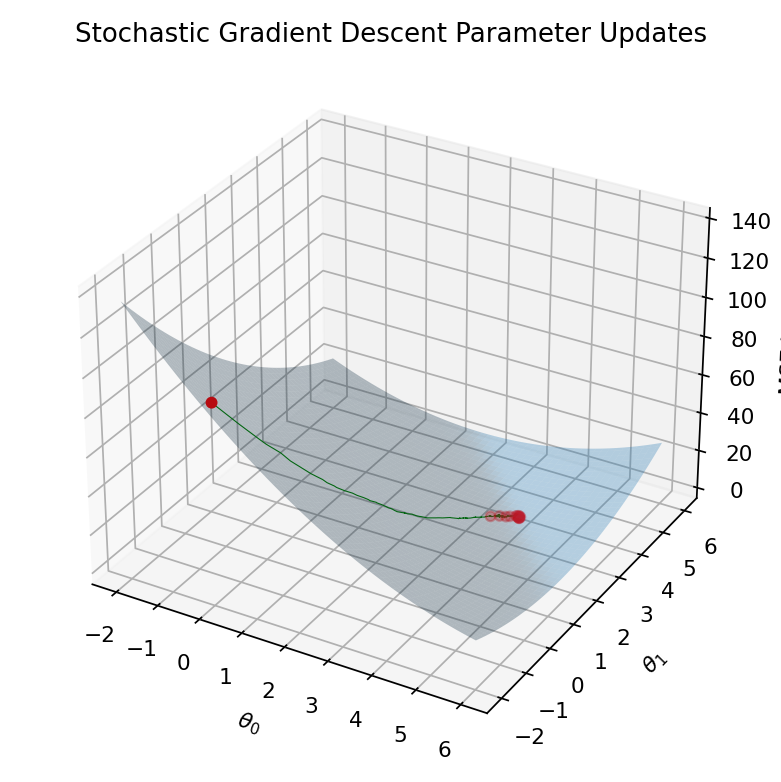

APPLYING MINI-BATCH GRADIENT DESCENT


<IPython.core.display.Javascript object>


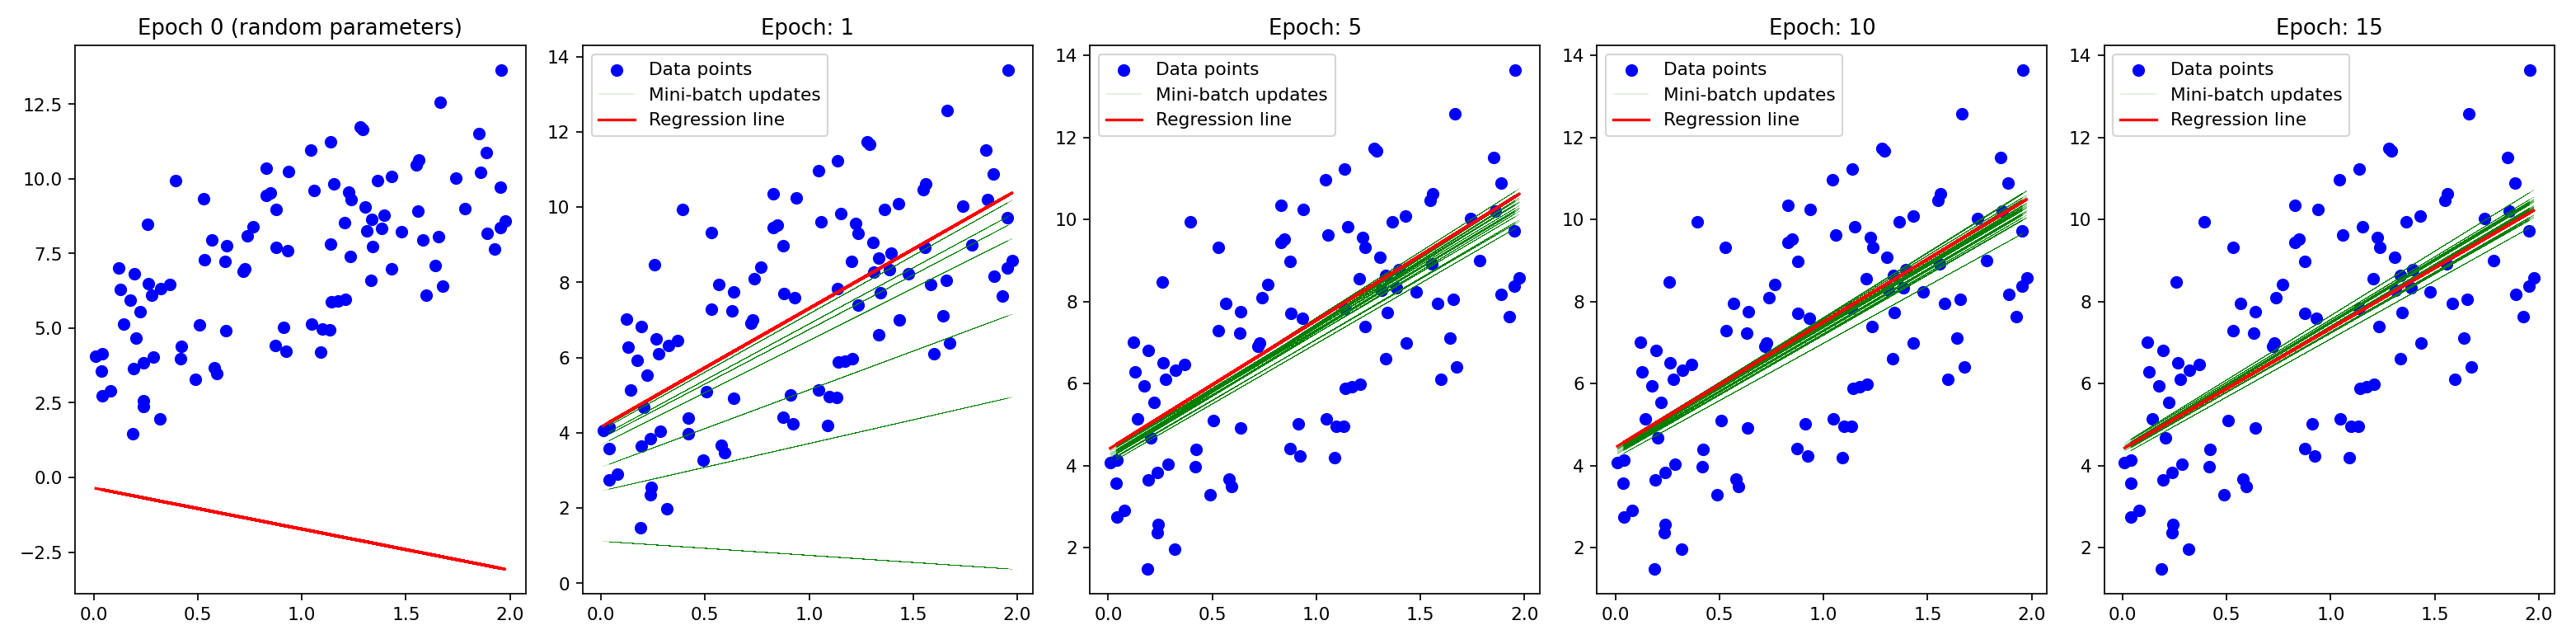

<IPython.core.display.Javascript object>


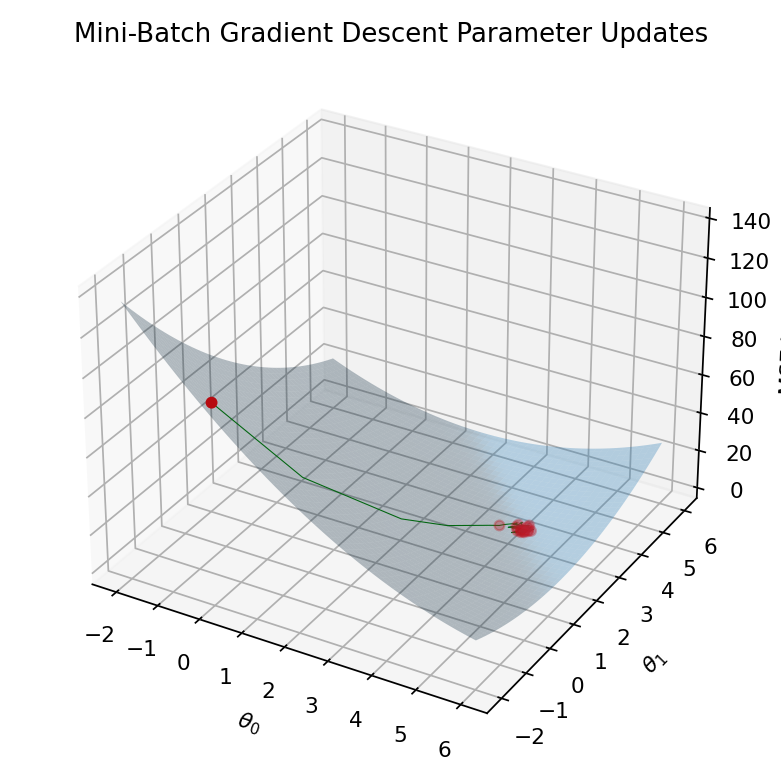

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Generate synthetic data
np.random.seed(0)
xtr = 2 * np.random.rand(100, 1)
ytr = 4 + 3 * xtr + 2*np.random.randn(100, 1)

# Initial parameters for our linear model
theta = np.random.randn(2,1)  # Random initialization
# Add a bias term (x0 = 1) to each instance
xbtr = np.c_[np.ones((100, 1)), xtr]

# Function to compute MSE
def compute_mse(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    mse = (1/m) * np.sum((predictions - y)**2)
    return mse

def loss_surface(w_0, w_1):
    m = len(ytr)
    predictions = w_0 + xtr*w_1
    return (1/m) * np.sum((predictions - ytr)**2)

# Function to plot data and regression line
def plot_regression_line(X, y, theta):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.scatter(X, y, color='blue', marker='o', label='Data points')
    X_line = np.array([[X.min()], [X.max()]])
    X_line_b = np.c_[np.ones((2, 1)), X_line]  # Adding bias term for line
    ax.plot(X_line, X_line_b.dot(theta), color='red', label='Regression line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()


w_0s = np.linspace(-2,6,100)
w_1s = np.linspace(-2,6,100)
loss_surf = []
for w_0 in w_0s:
    for w_1 in w_1s:
        loss_surf.append(loss_surface(w_0,w_1))

w_0g, w_1g = np.meshgrid(w_0s,w_1s)
loss_surf = np.array(loss_surf)
loss_surf = loss_surf.reshape(100,100)

##################################
######## Tunable Parameters ######
##################################
learning_rate = 0.1 #0.001 0.01 1.0
epochs = 15
tracked_epochs = [1,5,10,15,20]

def batch_gradient_descent(X, y, theta, learning_rate, epochs):
    print("APPLYING BATCH GRADIENT DESCENT")
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))
    for a in axes.reshape(-1):
        a.scatter(X[:,1], y, color='blue', marker='o', label='Data points')
    axes[0].plot(X[:,1], X.dot(theta), color='red', label='Regression line')
    axes[0].set_title(f"Epoch 0 (random parameters)")
    axes[0].legend()
    #processes all training data as a batch
    m = len(y)
    mse = compute_mse(X, y, theta)
    mse_ep_history = [mse]
    theta_ep_history = [theta]
    ax_i = 1
    for epoch in range(epochs+1):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
        mse = compute_mse(X, y, theta)
        mse_ep_history.append(mse)
        theta_ep_history.append(theta)
        y_pred = X.dot(theta)
        
        if epoch in tracked_epochs:
            axes[ax_i].plot(X[:,1], y_pred, color='red', label='Regression line')
            axes[ax_i].set_title(f"Epoch: {epoch}")
            ax_i+=1
    plt.tight_layout()
    plt.show()
    
    loss_fig = plt.figure(figsize=(5,5))
    loss_ax = loss_fig.add_subplot(projection='3d')
    theta_ep_history = np.array(theta_ep_history)
    loss_ax.scatter(theta_ep_history[:,0], theta_ep_history[:,1], mse_ep_history, color='red', label='Epoch updates')
    loss_ax.plot_surface(w_0g, w_1g, loss_surf, alpha=0.3, label='Loss Surface')
    loss_ax.set_title(f"Batch Gradient Descent Parameter Updates")
    loss_ax.set_zlabel("MSE Loss")
    loss_ax.set_xlabel(r"$\theta_0$")
    loss_ax.set_ylabel(r"$\theta_1$")
    plt.tight_layout()
    plt.show()
    
    return theta, mse_ep_history

def stochastic_gradient_descent(X, y, theta, learning_rate, epochs, t0=5, t1=50):
    print("APPLYING STOCHASTIC GRADIENT DESCENT")
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))
    for a in axes.reshape(-1):
        a.scatter(X[:,1], y, color='blue', marker='o', label='Data points')
    axes[0].plot(X[:,1], X.dot(theta), color='red', label='Regression line')
    axes[0].set_title(f"Epoch 0 (random parameters)")
    
    m = len(y)
    mse = compute_mse(X, y, theta)
    mse_ep_history = [mse]
    theta_ep_history = [theta]
    mse_b_history = [mse]
    theta_b_history = [theta]
    ax_i = 1
    for epoch in range(epochs+1):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_rate * t0 / (epoch * m + i + t1)
            theta = theta - eta * gradients
            theta_b_history.append(theta)
            mse = compute_mse(X, y, theta)
            mse_b_history.append(mse)
            axes[ax_i].plot(X[:,1], X.dot(theta), color='green', lw=0.1)
            
        mse = compute_mse(X, y, theta)
        mse_ep_history.append(mse)
        theta_ep_history.append(theta)
        y_pred = X.dot(theta)
        if epoch in tracked_epochs:
            axes[ax_i].plot(X[:,1], y_pred, color='green', label='SGD updates', lw=0.1)
            axes[ax_i].plot(X[:,1], y_pred, color='red', label='Regression line')
            axes[ax_i].set_title(f"Epoch: {epoch}")
            axes[ax_i].legend()
            ax_i+=1
    plt.tight_layout()
    plt.show()
    loss_fig = plt.figure(figsize=(5,5))
    loss_ax = loss_fig.add_subplot(projection='3d')
    theta_ep_history = np.array(theta_ep_history)
    theta_b_history = np.array(theta_b_history)
    loss_ax.scatter(theta_ep_history[:,0], theta_ep_history[:,1], mse_ep_history, color='red')
    loss_ax.plot(theta_b_history[:,0,0], theta_b_history[:,1,0], mse_b_history, color='green', lw=0.5)
    loss_ax.plot_surface(w_0g, w_1g, loss_surf, alpha=0.3)
    loss_ax.set_title(f"Stochastic Gradient Descent Parameter Updates")
    loss_ax.set_zlabel("MSE Loss")
    loss_ax.set_xlabel(r"$\theta_0$")
    loss_ax.set_ylabel(r"$\theta_1$")
    plt.tight_layout()
    plt.show()
    
    return theta, theta_ep_history

# Mini-Batch Gradient Descent implementation
def mini_batch_gradient_descent(X, y, theta, learning_rate, epochs, batch_size):
    print("APPLYING MINI-BATCH GRADIENT DESCENT")
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))
    for a in axes.reshape(-1):
        a.scatter(X[:,1], y, color='blue', marker='o', label='Data points')
    axes[0].plot(X[:,1], X.dot(theta), color='red', label='Regression line')
    axes[0].set_title(f"Epoch 0 (random parameters)")
    
    m = len(y)
    mse = compute_mse(X, y, theta)
    mse_ep_history = [mse]
    theta_ep_history = [theta]
    mse_b_history = [mse]
    theta_b_history = [theta]
    ax_i = 1
    for epoch in range(epochs+1):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - learning_rate * gradients
            theta_b_history.append(theta)
            mse = compute_mse(X, y, theta)
            mse_b_history.append(mse)
            axes[ax_i].plot(X[:,1], X.dot(theta), color='green', lw=0.1)
        mse = compute_mse(X, y, theta)
        theta_ep_history.append(theta)
        mse_ep_history.append(mse)
        y_pred = X.dot(theta)
        if epoch in tracked_epochs:
            axes[ax_i].plot(X[:,1], y_pred, color='green', label='Mini-batch updates', lw=0.1)
            axes[ax_i].plot(X[:,1], y_pred, color='red', label='Regression line')
            axes[ax_i].set_title(f"Epoch: {epoch}")
            axes[ax_i].legend()
            ax_i+=1
    plt.tight_layout()
    plt.show()
    loss_fig = plt.figure(figsize=(5,5))
    loss_ax = loss_fig.add_subplot(projection='3d')
    theta_ep_history = np.array(theta_ep_history)
    theta_b_history = np.array(theta_b_history)
    loss_ax.scatter(theta_ep_history[:,0], theta_ep_history[:,1], mse_ep_history, color='red')
    loss_ax.plot(theta_b_history[:,0,0], theta_b_history[:,1,0], mse_b_history, color='green', lw=0.5)
    loss_ax.plot_surface(w_0g, w_1g, loss_surf, alpha=0.3)
    loss_ax.set_title(f"Mini-Batch Gradient Descent Parameter Updates")
    loss_ax.set_zlabel("MSE Loss")
    loss_ax.set_xlabel(r"$\theta_0$")
    loss_ax.set_ylabel(r"$\theta_1$")
    plt.tight_layout()
    plt.show()
    return theta, mse_ep_history


# Applying Batch Gradient Descent
theta_bgd, mse_history_bgd = batch_gradient_descent(xbtr, ytr, theta, learning_rate, epochs)

# Applying Stochastic Gradient Descent
theta_sgd, mse_history_sgd = stochastic_gradient_descent(xbtr, ytr, theta, learning_rate, epochs)

# Applying Mini-Batch Gradient Descent
batch_size = 20
theta_mbgd, mse_history_mbgd = mini_batch_gradient_descent(xbtr, ytr, theta, learning_rate, epochs, batch_size)


# Neural Networks
 
From this point onwards, learnable parameters $\theta$ of a model are now referred to as weights $w$
 
### Perceptrons
Perceptrons are the building blocks of neural networks. They are very similar to the linear regression model, except the linear combination $z$ (called 'net' in the diagram) is passed through an activation function $\sigma(z)$.
 
<img src="perceptron.png" width="750" align="center">
 
Activation functions serve many purposes like introducing non-linearities into the model to help learn complex patterns, attenuating and limiting the output of perceptrons to stabilize models or mapping our input to an appropriate output space - as we saw with the softmax activation function which allowed us to perform classification.
 
<img src="activations.png" width="750" align="center">
 
### Multi-layer Perceptron
 
A a multi-layer perceptron (MLP) (or fully connected neural network, feed forward neural network) is 2 or more perceptrons arranged in a layered formation:
 
<img src="one_layer_nn.png" width="750" align="center">
 
    There are 3 nodes in the input layer, 4 nodes in the hidden layer, and 2 nodes in the output layer.

<u> Forward propagation</u>: also referred to as a forward pass, this describes the process of the neural network passing input $x$ through the layers to compute the final output $\hat{y}$. It is used for inference (predicting) and also for training.

$$
\textbf{Compact Form:} \quad Z = XW^{(1)} = 
\begin{pmatrix}
x_1 & x_2 & x_3
\end{pmatrix}
\begin{pmatrix}
w^{(1)}_{11} & w^{(1)}_{12} & w^{(1)}_{13} & w^{(1)}_{14} \\
w^{(1)}_{21} & w^{(1)}_{22} & w^{(1)}_{23} & w^{(1)}_{24} \\
w^{(1)}_{31} & w^{(1)}_{32} & w^{(1)}_{33} & w^{(1)}_{34}
\end{pmatrix}
=
\begin{pmatrix}
z_1 & z_2 & z_3 & z_4
\end{pmatrix}
$$
 
$$
\textbf{Expanded Form:} \quad
\begin{aligned}
z_1 &= x_1w^{(1)}_{11} + x_2w^{(1)}_{21} + x_3w^{(1)}_{31}, \\
z_2 &= x_1w^{(1)}_{12} + x_2w^{(1)}_{22} + x_3w^{(1)}_{32}, \\
z_3 &= x_1w^{(1)}_{13} + x_2w^{(1)}_{23} + x_3w^{(1)}_{33}, \\
z_4 &= x_1w^{(1)}_{14} + x_2w^{(1)}_{24} + x_3w^{(1)}_{34}.
\end{aligned}
$$

$$ A = g(Z) = g(\begin{pmatrix}
z_1 & z_2 & z_3 & z_4
\end{pmatrix}) = \begin{pmatrix}
a_1 & a_2 & a_3 & a_4
\end{pmatrix}
$$

$$
\textbf{Compact Form:} \quad \hat{Y} = AW^{(2)} = 
\begin{pmatrix}
a_1 & a_2 & a_3 & a_4
\end{pmatrix}
\begin{pmatrix}
w^{(2)}_{11} & w^{(2)}_{12} \\
w^{(2)}_{21} & w^{(2)}_{22} \\
w^{(2)}_{31} & w^{(2)}_{32} \\
w^{(2)}_{41} & w^{(2)}_{42}
\end{pmatrix}
=
\begin{pmatrix}
\hat{y}_1 & \hat{y}_2
\end{pmatrix}
$$
 
$$
\textbf{Expanded Form:} \quad
\begin{aligned}
\hat{y}_1 &= a_1w^{(2)}_{11} + a_2w^{(2)}_{21} + a_3w^{(2)}_{31} + a_4w^{(2)}_{41}, \\
\hat{y}_2 &= a_1w^{(2)}_{12} + a_2w^{(2)}_{22} + a_3w^{(2)}_{32} + a_4w^{(2)}_{42}.
\end{aligned}
$$

<u> Back propagation</u>: during training the loss information from the output layer is propagated back through the network by computing the gradients for ALL weights $w_i$ and applying gradient descent to all of these weights.
 
<img src="forward_back_prop.png" width="750" align="center">
 
The figure shows how we can formalize forward propagation using matrix notation. $A^{[l]}$ denotes the inputs/outputs for each layer $l$. For a network with $L$ layers, $X=A^{[0]}$ only acts as input and $\hat{y}=A^{[L]}$ only acts as output. The remaining $A^{[l]}$ act as both input and output simultaneously.  $W^{[l]}$ refers to a matrix of weights applied to $A^{[l-1]}$. They use $b^{[l]}$ to denote the 'bias' (like our intercept parameter $\theta_0$ in the regression model). The chain rule allows us to find the gradient of the loss function with respect to any weight $\frac{\partial L}{\partial W^{[l]}}$ shown in the figure as $dW^{[l]}$.
 
After we derive the gradients for each weight we can apply the weight update as with the linear regression example:
$$W^{[l]}= W^{[l]} - \eta \frac{\partial Loss}{\partial W^{[l]}}$$

# PyTorch

PyTorch is a machine learning library for Python widely used for developing neural networks. 

Tensors are the primary building blocks in PyTorch. They are similar to NumPy arrays with the added ability to be processed with and stored on GPUs.

#### Building Datasets
 
**torch.utils.data.Dataset**: An abstract class for representing a dataset. Implementing a custom datasets involves subclassing Dataset and implementing the **\_\_len\_\_()** and **\_\_getitem\_\_()** methods.
 
**torch.utils.data.DataLoader**: Wraps a dataset and provides access to batches of data, useful for implementing different types of gradient descent techniques.
 

In [2]:
# FEATURES
# LSTAT - % lower status of the population
# INDUS - proportion of non-retail business acres per town
# NOX - nitric oxides concentration (parts per 10 million)
# PTRATIO - pupil-teacher ratio by town
# RM - average number of rooms per dwelling
# TAX - full-value property-tax rate per $10,000
# DIS - weighted distances to five Boston employment centres
# AGE - proportion of owner-occupied units built prior to 1940

# TARGET
# MEDV - Median value of owner-occupied homes in $1000's

import pandas as pd  # Pandas is a library used for data manipulation and analysis
from sklearn.preprocessing import MinMaxScaler  # MinMaxScaler is used to normalize data between a specified range
import torch  # Imports PyTorch
import torch.nn as nn  # nn module contains building blocks for neural networks
import torch.nn.functional as F  # Functional provides activation functions, loss functions, etc.
from torch.utils.data import DataLoader, Dataset, random_split  # Utilities for managing data and batching
import numpy as np

# Set a random seed for reproducibility
np.random.seed(0)

# Import and Process Data
# Define column names for dataset (features and target variable)
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Load the dataset from a CSV file, using whitespace as a delimiter
# `header=None` ensures no row is treated as a header
# `delimiter=r"\s+"` allows flexible whitespace separation between values
# `names=column_names` assigns meaningful names to columns
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5)) #print first 5 samples from the dataset

# Select relevant features to predict housing prices
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE'] 

# Extract the selected feature columns from the dataset
# `.loc[:, column_sels]` selects all rows (`:`) and only the specified columns (`column_sels`)
x = data.loc[:, column_sels]  # Returns a DataFrame of shape (num_samples, num_features)

# Feature Scaling - Normalize data to bring all features to the same scale
# This helps prevent certain features from dominating during training due to different ranges
min_max_scaler = MinMaxScaler()  # Instantiate a MinMaxScaler object
x = min_max_scaler.fit_transform(x)  # Normalize x to a range [0,1]

# Extract target variable (house price in $1000s) 
y = data['MEDV'].values #<- returns a 1D numpy array of shape (num_training_samples,)

# Convert feature matrix (x) and target variable (y) to PyTorch tensors
# Tensors allow PyTorch models to utilize GPU acceleration
x_tensor = torch.tensor(x, dtype=torch.float32)  # Convert feature matrix to a float32 tensor
y_tensor = torch.tensor(y, dtype=torch.float32)  # Convert target variable to a float32 tensor

# Define a custom Dataset class for PyTorch
class BostonHousing(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor
        
    def __len__(self):
        #this function tells the DataLoader how to determine the size of our dataset (tensors x, y)
        return len(self.x)
    
    def __getitem__(self, idx):
        #this function is meant to tell the DataLoader how it can sample from the dataset (tensors x, y) at the given index idx
        #this is important because not all datasets are represented as arrays, but the DataLoader always needs a consistent method for accessing the data
        return self.x[idx], self.y[idx]

    
dataset = BostonHousing(x_tensor, y_tensor)

# Create the DataLoader
batch_size = 50 #(mini-batch size) hyper-parameter that we can tune empirically

train_set, test_set = random_split(dataset, [0.7, 0.3])

train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
#DataLoader handles batch loading, shuffling, and iteration over the dataset.
'''- batch_size: Number of samples in each batch (e.g., 50 means training on 50 samples at a time).
    - shuffle=True: Shuffling the dataset before batching prevents the model from learning unintended patterns.
      This is important because, without shuffling, the model might learn patterns based on data order rather than feature relationships.
'''
test_loader = DataLoader(dataset=test_set, batch_size=batch_size)
''' 
Test DataLoader does not require shuffling because we are only evaluating the model, not learning from the order of samples.
- batch_size: Still relevant because it affects how efficiently the model processes data during testing.
'''

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


' \nTest DataLoader does not require shuffling because we are only evaluating the model, not learning from the order of samples.\n- batch_size: Still relevant because it affects how efficiently the model processes data during testing.\n'

#### Definining Model Architecture

**nn Module** provides a high-level abstraction for building neural networks, including layers, activation functions, and more. Models are defined by subclassing the nn.Module class.

The cell bellow is a simple example of a neural network for regression. The input_size is the number of nodes in the input layer, which is the number of features we are using in our dataset. The output_size is the number of nodes in the output layer, which is the number of target variables we are trying to predict. The h1_size and h2_size are the number of nodes in our hidden layer, PyTorch uses layers sizes to automatically infers the number of weights required to connect the layers. 

In [3]:
# Define a Model Architecture
# Define a neural network for regression tasks by inheriting from nn.Module
class RegressionNN(nn.Module):
    def __init__(self, input_size, h1_size, h2_size, output_size):
        super(RegressionNN, self).__init__()
        
        # Define the first fully connected (linear) layer:
        # This layer takes input of size 'input_size' and outputs 'h1_size' features.
        self.fc1 = nn.Linear(input_size, h1_size)
        
        # Define the second fully connected layer:
        # It receives 'h1_size' features from the previous layer and outputs 'h2_size' features.
        self.fc2 = nn.Linear(h1_size, h2_size)
        
        # Define the third fully connected layer:
        # It takes 'h2_size' features and produces the final output of size 'output_size'.
        self.fc3 = nn.Linear(h2_size, output_size)
    
    def forward(self, x):
        # The forward method defines the data flow through the network.
        #x is a tensor of shape (batch_size, num_attributes)
        
        # Pass the input 'x' through the first layer and apply ReLU activation.
        x = F.relu(self.fc1(x))
        # Pass the output through the second layer and again apply ReLU activation.
        x = F.relu(self.fc2(x))
        
        # Pass the data through the third (output) layer.
        # No activation function is applied here because for regression we want a linear output.
        x = self.fc3(x)  
        return x

input_size = x_tensor.shape[1] #<-- num_attributes
hidden1_size = 64  # Number of neurons in the first hidden layer (this is a tunable parameter)
hidden2_size = 32  # Number of neurons in the second hidden layer (also tunable)
outuput_size = 1

model = RegressionNN(input_size, hidden1_size, hidden2_size, outuput_size)

When you create a class that inherits from nn.Module, you’re not just writing a container for layers—you’re creating a highly organized structure that keeps track of everything needed for both forward and backward passes.

When you assign instances of other nn.Module classes (like layers) to attributes of your module, they get stored in an internal _modules dictionary. This hierarchical organization means that if your model contains other modules (e.g., layers within layers), PyTorch can traverse the entire structure to find all parameters and buffers automatically.

In [4]:
print(model._modules)

OrderedDict([('fc1', Linear(in_features=8, out_features=64, bias=True)), ('fc2', Linear(in_features=64, out_features=32, bias=True)), ('fc3', Linear(in_features=32, out_features=1, bias=True))])


Every learnable parameter (weights, biases, etc.) gets stored in an internal dictionary (typically named _parameters) for PyTorch to access and update them during training.

We haven't defined any parameters in our model since we defined our model using nn.Linear (which also inherit from nn.Module)

In [5]:
print(model._parameters)

OrderedDict()


In [6]:
print(model.fc1._parameters['weight'].shape)
print(model.fc2._parameters['weight'].shape)
print(model.fc3._parameters['weight'].shape)
print(model.fc3._parameters)

torch.Size([64, 8])
torch.Size([32, 64])
torch.Size([1, 32])
OrderedDict([('weight', Parameter containing:
tensor([[ 0.0930, -0.1348, -0.0372, -0.1417, -0.0405,  0.1726,  0.0601, -0.0868,
          0.1238, -0.1304,  0.0027, -0.0147, -0.1379,  0.1425, -0.0789,  0.0629,
         -0.0239, -0.0912,  0.1015,  0.1129,  0.1144, -0.0546, -0.1597,  0.0292,
          0.0276, -0.0013,  0.0487,  0.0689, -0.0847, -0.1144, -0.1313, -0.1725]],
       requires_grad=True)), ('bias', Parameter containing:
tensor([-0.0423], requires_grad=True))])


In [7]:
#But we can call model.parameters to recursively retrieve all parameters from 
for i in model.parameters():
    print(i)

Parameter containing:
tensor([[ 1.4517e-01,  2.8073e-02,  2.1225e-01,  1.4329e-01, -6.3586e-02,
         -1.8221e-01, -4.5712e-02,  2.6823e-01],
        [ 2.7243e-01, -3.0282e-01,  2.9878e-01, -1.1208e-01,  2.3080e-01,
         -1.3912e-01,  2.1088e-01, -8.7321e-02],
        [ 2.6390e-01, -2.9652e-01,  1.0575e-01,  2.7681e-01, -3.0387e-01,
          2.1926e-01, -5.4355e-02, -7.1432e-02],
        [ 2.2396e-01, -3.2915e-01,  1.6670e-01, -1.9643e-01, -2.3551e-01,
          2.4103e-01,  5.2779e-02, -4.8350e-02],
        [ 3.4115e-01, -5.4132e-02,  3.1739e-01, -1.6567e-01, -2.7726e-01,
         -8.0680e-02, -2.8973e-01,  2.9906e-01],
        [-2.1712e-01, -8.5460e-02,  3.3680e-01, -1.1914e-01, -4.2320e-02,
         -4.3944e-02,  1.5039e-02,  9.6063e-02],
        [-1.5338e-01,  3.3559e-01,  2.5423e-01,  1.5479e-01,  2.9549e-01,
          1.1933e-01,  6.6102e-02, -1.6699e-01],
        [-3.3741e-01,  2.0695e-01, -1.1682e-01,  1.8946e-01, -2.4992e-03,
          2.8094e-01, -1.1587e-01, -2.2455e

#### Choosing an Optimization Strategy

PyTorch supports several optimizers under **torch.optim**

The optimization strategies discussed previously can be implemented by varying the arguments of **torch.optim.SGD**

Adam (Adaptive Moment Estimation) is arguably the most widely used an universally effective optimizing method.It can be implemented with **torch.optim.Adam**

When you set up an optimizer in PyTorch, you pass it the parameters of your model

The optimizer receives references to the model’s parameters (through model.parameters()). This means that it doesn’t copy the parameters but holds pointers to the same tensors that are stored in your model. For each parameter, the optimizer creates an entry in a state dictionary. The optimizer also stores the hyperparameters that control the update rules, such as the learning rate

In [8]:
# Choose an Optimization Strategy
learning_rate = 0.001

# Initialize the Adam optimizer from PyTorch
# Adam stands for Adaptive Moment Estimation and adapts the learning rate for each parameter.
# The 'model.parameters()' call passes all the weights and biases of our model to be updated.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# The first argument of Adam passes all of the parameters (weights) of the network to the optimizer

loss_fn = nn.MSELoss()  # Mean Squared Error Loss for regression tasks. We're also using this as our evaluation metric

#### Training the Model

Training involves iterating over the dataset, making predictions (forward pass), calculating the loss, and updating the model parameters based on the gradients (backward pass).

In [9]:
# Training the Model
import torch.nn.functional as F

train_losses = []
test_losses = []

num_epochs = 100
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    train_loss = 0
    
    # Loop over batches of training data provided by the DataLoader
    for inputs, targets in train_loader: 
        # Forward pass: compute predicted outputs by passing inputs through the model
        outputs = model(inputs)
        # Calculate the loss between the model's predictions and the true targets
        loss = loss_fn(outputs, targets) 
        '''
        PyTorch's Dynamic Computational Graph:
            PyTorch constructs the computational graph on the fly as operations are executed. Each time your model
            performs an operation (like addition, multiplication, or a layer forward pass), PyTorch records that 
            operation and how it relates to its inputs.

            Nodes: Represent tensors and the operations that produce them.
            Edges: Represent the functions or operations that connect these tensors. Each operation that produces a new tensor stores a reference (via grad_fn) to a function that knows how to compute its derivative.
            
            This loss value is the final node in your computational graph and is connected (directly or indirectly)
            to all the parameters that influenced it.
        '''
        
        ################# Backpropagation #################
        optimizer.zero_grad() # clear any existing gradients from previous iterations
        loss.backward() # backward pass to compute gradients of loss w.r.t all model parameters
        '''
            loss.backward() triggers PyTorch’s automatic differentiation engine. 
            
            It traverses the nn.Module’s stored parameters (and uses the computational graph) to compute
            gradients for each parameter.
        '''
        optimizer.step() # update model parameters using the computed gradients
        '''
            The optimizer uses these gradients along with the stored state information to update the parameters.
            This involves applying the specific update rule defined by the optimizer.
        '''
        
        train_loss += loss.item()
        
    train_loss /= len(train_loader.dataset) # Compute the average training loss per sample over the entire epoch
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}, Train MSE: {train_loss}')
    
    #This following step isn't necessarily part of the 'training loop'
    #Here we're just getting the MSE of the test data after every epoch for later analysis
    model.eval() # set the model to evaluation mode
    test_loss = 0
    with torch.no_grad(): #disables gradient tracking (no computational graph) during the execution of the enclosed code block - more efficient, saves memory
        for inputs, targets in test_loader: 
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            test_loss += loss.item()
    test_loss /= len(test_loader.dataset)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
print("Done")

Epoch 10, Train MSE: 8.14372782102773
Epoch 20, Train MSE: 2.302769373504209
Epoch 30, Train MSE: 2.078305773667886
Epoch 40, Train MSE: 1.9282890158639827
Epoch 50, Train MSE: 1.890969907733756
Epoch 60, Train MSE: 2.184715743803642
Epoch 70, Train MSE: 1.7841711635320958
Epoch 80, Train MSE: 1.958113828847106
Epoch 90, Train MSE: 1.8930186097051056
Epoch 100, Train MSE: 2.1325591718646844
Done


#### Evaluating the Network


In [10]:
model.eval()  # set the model to evaluation mode
loss = 0
with torch.no_grad():
    for inputs, targets in test_loader:
            outputs = model(inputs)
            loss += loss_fn(outputs, targets) #for this network our loss function is the same as the evaluation metric
    test_loss = loss / len(test_loader.dataset)
    print(f'Final Loss on the dataset: {test_loss}')

Final Loss on the dataset: 1.772412896156311


<IPython.core.display.Javascript object>


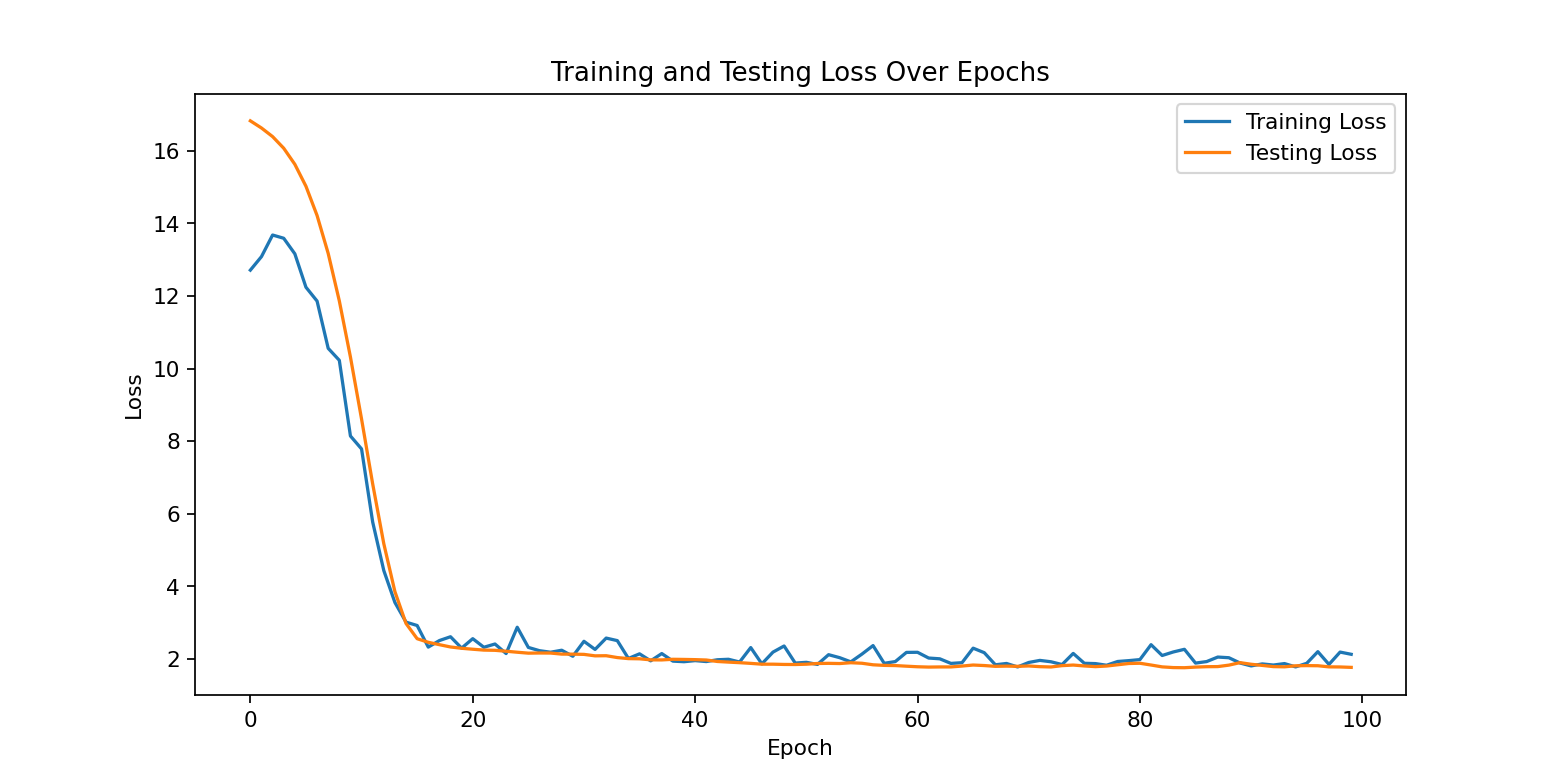

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Over Epochs')
plt.legend()
plt.show()